In [ ]:
import pandas as pd


from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


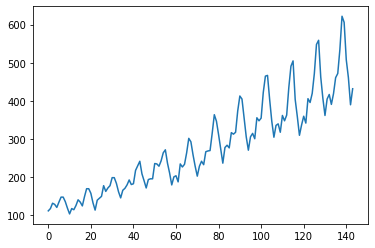

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,GRU,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/content/gdrive/MyDrive/airline-passengers-1.csv')
df.head()
df.drop(['Month'],axis=1,inplace=True)
dataset = np.array(df)
dataset.reshape(-1,1)
plt.plot(dataset)

In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [ ]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train=dataset[:train_size,:]
test=dataset[train_size:142,:]
def getdata(data,lookback):
    X,Y=[],[]
    for i in range(len(data)-lookback-1):
        X.append(data[i:i+lookback,0])
        Y.append(data[i+lookback,0])
    return np.array(X),np.array(Y).reshape(-1,1)
lookback=1
X_train,y_train=getdata(train,lookback)
X_test,y_test=getdata(test,lookback)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
model1=Sequential()
model1.add(GRU(10,input_shape=(1,lookback)))
for i in range(10):
        model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam',metrics='accuracy')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                390       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2

In [ ]:
from tensorflow import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history1 = LossHistory()

model1.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0, callbacks=[history1])
y_pred=model1.predict(X_test)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

1/1 [==============================] - 1s 578ms/step


In [ ]:

print(history1.losses)

[0.028317132964730263, 0.045836903154850006, 0.037103861570358276, 0.029310336336493492, 0.036117054522037506, 0.09164295345544815, 0.07870139181613922, 0.08703286200761795, 0.08032551407814026, 0.07455934584140778, 0.07285626232624054, 0.07209127396345139, 0.06856802850961685, 0.06369083374738693, 0.0603007934987545, 0.05653788521885872, 0.06799757480621338, 0.06509150564670563, 0.06677461415529251, 0.07898588478565216, 0.07528074830770493, 0.07194148004055023, 0.06883127242326736, 0.06801489740610123, 0.06673357635736465, 0.06884995102882385, 0.06641490012407303, 0.06477641314268112, 0.06403003633022308, 0.0666181892156601, 0.06454446911811829, 0.06253982335329056, 0.0632784515619278, 0.06171277537941933, 0.06136374548077583, 0.0650213286280632, 0.06677365303039551, 0.06736522167921066, 0.06574025005102158, 0.06412304192781448, 0.06676488369703293, 0.06537990272045135, 0.06386487185955048, 0.06288090348243713, 0.06421059370040894, 0.06668507307767868, 0.0653550997376442, 0.0653566345

In [ ]:


model2=Sequential()
model2.add(LSTM(10,input_shape=(1,lookback)))
for i in range(10):
        model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam',metrics='accuracy')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
from tensorflow import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history2 = LossHistory()

model2.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0, callbacks=[history2])
y_pred=model2.predict(X_test)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

1/1 [==============================] - 0s 480ms/step


In [ ]:
print(history2.losses)

[0.0035814852453768253, 0.00561890285462141, 0.026944300159811974, 0.03548659384250641, 0.03956059366464615, 0.06029970571398735, 0.08938783407211304, 0.09806865453720093, 0.1032036617398262, 0.09427304565906525, 0.08805962651968002, 0.08179370313882828, 0.08490873128175735, 0.08048427850008011, 0.07616428285837173, 0.07196929305791855, 0.07136566191911697, 0.06876178830862045, 0.06527003645896912, 0.06344662606716156, 0.06048506125807762, 0.05886950343847275, 0.07607656717300415, 0.07335364818572998, 0.07355587184429169, 0.07432441413402557, 0.07917969673871994, 0.08315455913543701, 0.08199667930603027, 0.08200669288635254, 0.0863354280591011, 0.0845203623175621, 0.08482510596513748, 0.08474816381931305, 0.08449611067771912, 0.08233987540006638, 0.08014778792858124, 0.07882397621870041, 0.07875118404626846, 0.0767846629023552, 0.0749262347817421, 0.07348157465457916, 0.07428502291440964, 0.07278887182474136, 0.07382537424564362, 0.07302024215459824, 0.07227044552564621, 0.072330445051

In [ ]:
from tensorflow import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history3 = LossHistory()
model3=Sequential()
model3.add(keras.layers.LSTM(10,input_shape=(1,lookback)))
for i in range(10):
        model3.add(Dense(1))
model3.compile(loss='mean_squared_error',optimizer='adam',metrics='accuracy')
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
 dense_21 (Dense)            (None, 1)                 2         
                                                                 
 dense_22 (Dense)            (None, 1)                 2         
                                                                 
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
 dense_24 (Dense)            (None, 1)                 2         
                                                                 
 dense_25 (Dense)            (None, 1)                

In [ ]:
from tensorflow import keras
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history3 = LossHistory()

model3.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0, callbacks=[history3])
y_pred=model2.predict(X_test)
y_test=scaler.inverse_transform(y_test)
y_pred=scaler.inverse_transform(y_pred)

1/1 [==============================] - 0s 16ms/step


In [ ]:
print(history3.losses)

[0.16531051695346832, 0.08284153044223785, 0.05629073083400726, 0.0695832222700119, 0.05861104652285576, 0.07188703119754791, 0.06903179734945297, 0.06101864203810692, 0.05517372116446495, 0.07336758077144623, 0.07396221160888672, 0.07196570187807083, 0.08299165219068527, 0.07893934100866318, 0.07367806881666183, 0.09066081047058105, 0.08714104443788528, 0.08229991793632507, 0.08465360105037689, 0.08057444542646408, 0.07764691859483719, 0.07852119952440262, 0.08026270568370819, 0.0897786095738411, 0.08924812078475952, 0.08584762364625931, 0.0852324590086937, 0.08220169693231583, 0.08002762496471405, 0.07856317609548569, 0.0773593932390213, 0.08024100959300995, 0.07803666591644287, 0.07574573159217834, 0.07481185346841812, 0.07296967506408691, 0.07111991196870804, 0.07018866389989853, 0.07124856859445572, 0.07218126207590103, 0.07067647576332092, 0.06903249770402908, 0.07327249646186829, 0.07161373645067215, 0.07023325562477112, 0.06932125240564346, 0.0689687430858612, 0.068076476454734

In [ ]:
for 